# <font color=green>OSA case study</font>
## <font color=dark>Applying simple Principal Component Analysis (PCA) <font>

* ### PRDL & MLLB courses ETSIT - UPM
---


<font size= 5 color=magenta>----------------------------------------------------------------</font>
<font size= 5 color=magenta>----------------------------------------------------------------</font>

## Reading OSA Data: We are going to use EXTREME cases to have severe/healthy classes

*  ## OSA_extreme_male.xlsx

This code block uses `google.colab.files.upload()` to allow the user to upload files directly into the Colab environment. The `for` loop then iterates through the uploaded files, printing their names and sizes. This is a common way to get data files into a Colab notebook for processing when they are not hosted online or in Google Drive.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OSA_extreme_male.xlsx to OSA_extreme_male.xlsx
User uploaded file "OSA_extreme_male.xlsx" with length 19281 bytes


This block imports the `pandas` library, a fundamental tool for data manipulation and analysis in Python. It then defines the filename for the Excel file and uses `pd.ExcelFile()` to create an ExcelFile object. This object allows for reading specific sheets from an Excel workbook, which is useful when a file contains multiple sheets.

In [ ]:
# Import pandas
import pandas as pd

# Read Excell with extreme male cases
file = 'OSA_extreme_male.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)



Here, the `parse()` method of the `ExcelFile` object is used to load a specific sheet ('Sheet1') from the Excel file into a pandas DataFrame named `df_OSA`. This is a standard procedure for extracting data from a chosen sheet within an Excel workbook for further analysis.

In [ ]:

# Load a sheet into a DataFrame by name: df_OSA
df_OSA = xl.parse('Sheet1')

The `df_OSA.head(2)` command displays the first two rows of the `df_OSA` DataFrame. This is a quick and essential step in data exploration to get a preview of the data structure, column names, and the types of values present, helping to verify that the data was loaded correctly.

In [ ]:
df_OSA.head(2)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906


This code block creates a new DataFrame `df` by selecting a subset of columns from `df_OSA`: 'Weight', 'Height', 'Age', 'Cervical', and 'BMI'. This is done because the subsequent PCA analysis is intended to be 'unsupervised', meaning the target variables ('IAH' and 'OSA') are excluded from the feature set used for dimensionality reduction.

In [ ]:
df = df_OSA[['Weight','Height','Age','Cervical','BMI']]


Similar to `df_OSA.head(2)`, `df.head(5)` displays the first five rows of the newly created `df` DataFrame. This confirms that the column selection was successful and allows for a quick check of the data in the DataFrame that will be used for PCA.

In [ ]:
df.head(5)

,Weight,Height,Age,Cervical,BMI
0,80,173,32,40,26.729927
1,109,190,32,42,30.193906
2,86,169,39,42,30.110991
3,145,172,47,44,49.012980
4,90,180,36,40,27.777778


This block imports necessary libraries for PCA (`sklearn.decomposition.PCA`) and plotting (`matplotlib.pyplot`). It then initializes a PCA model with `n_components = 5`, which is equal to the number of features in `df`. The `pca.fit(df)` method then computes the principal components from the unscaled data. This step aims to understand the components before considering the effect of scaling.

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

### LET's try with the same number of components than features
### KNOW what defines the limit
n_components = 5

pca = PCA(n_components = n_components)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(df)

PCA(n_components=5)

This code extracts the first two principal components (PC1 and PC2) from the `pca.components_` attribute. `pca.components_` contains the eigenvectors (principal components) as rows, and each component represents a direction in the original feature space. PC1 captures the most variance, and PC2 captures the second most variance. These components are later used for visualization.

In [ ]:
## project data into PC space

# 0,1 denote PC1 and PC2; change values for other PCs
PC1 = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
PC2 = pca.components_[1]

This cell visualizes the loadings of the first two principal components (PC1 and PC2) on the original features. It creates two horizontal bar plots, one for PC1 and one for PC2, showing the contribution (or weight) of each original feature ('Weight', 'Height', 'Age', 'Cervical', 'BMI') to that principal component. This helps in understanding which features are most influential in defining each principal component. The output `<BarContainer object of 5 artists>` confirms the plot was created successfully.

<BarContainer object of 5 artists>

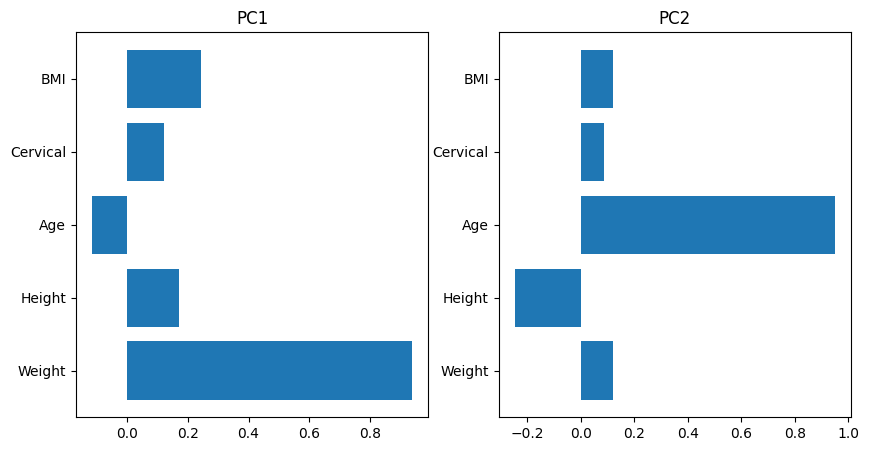

In [ ]:
features = df.columns
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.barh(features,PC1)
plt.title("PC1")
plt.subplot(122)
plt.title("PC2")
plt.barh(features,PC2)

This block emphasizes the importance of scaling data before applying PCA. It imports `StandardScaler` from `sklearn.preprocessing`, which standardizes features by removing the mean and scaling to unit variance. The `scaler.fit(df)` method calculates the mean and standard deviation for each feature, and `X_scaled = scaler.transform(df)` applies this scaling to the data. Finally, `pca.fit(X_scaled)` re-runs PCA on the *scaled* data, and PC1 and PC2 are re-extracted. Scaling is crucial for PCA because features with larger scales might dominate the principal components, leading to biased results.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

X_scaled = scaler.transform(df)

pca.fit(X_scaled)

# 0,1 denote PC1 and PC2; change values for other PCs
PC1 = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
PC2 = pca.components_[1]

This code verifies that the `StandardScaler` has correctly normalized the data. It prints the mean and standard deviation of each feature in `X_scaled`. For correctly standardized data, the mean of each feature should be close to zero, and the standard deviation should be close to one. This check confirms that the scaling operation was successful, which is important for the validity of the subsequent PCA results.

In [ ]:
import numpy as np

# Verify normalization:

# Zero mean
print('Features means after normalization \n',
     list(np.mean(X_scaled,axis=0)))

print('\nStandard deviation after normalization \n',
     list(np.std(X_scaled,axis=0)))


Features means after normalization 
 [np.float64(4.792329602698517e-17), np.float64(-1.0351431941828798e-15), np.float64(1.7252386569714664e-16), np.float64(-9.712454661468996e-16), np.float64(-1.0079866597675882e-15)]

Standard deviation after normalization 
 [np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


This cell re-generates the bar plots for PC1 and PC2, but this time using the principal components derived from the *scaled* data. By comparing these plots with the previous ones (from unscaled data), one can observe how scaling changes the contribution of each original feature to the principal components, often leading to a more balanced and interpretable representation. The output `<BarContainer object of 5 artists>` indicates the plots were successfully generated.

<BarContainer object of 5 artists>

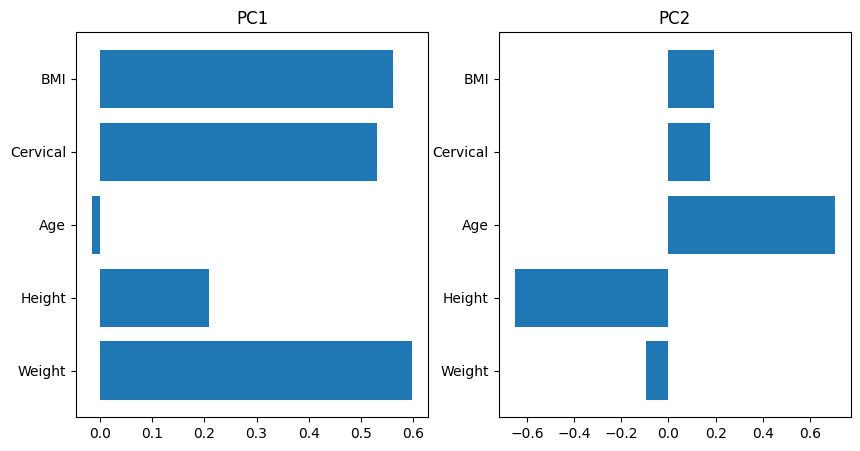

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.barh(features,PC1)
plt.title("PC1")
plt.subplot(122)
plt.title("PC2")
plt.barh(features,PC2)

This code plots the cumulative explained variance ratio. `pca.explained_variance_ratio_` gives the percentage of variance explained by each individual principal component. `np.cumsum()` calculates the cumulative sum of these ratios. The plot shows how much of the total variance in the original data is captured by including an increasing number of principal components. This helps in deciding the optimal number of components to retain for dimensionality reduction while preserving sufficient information.

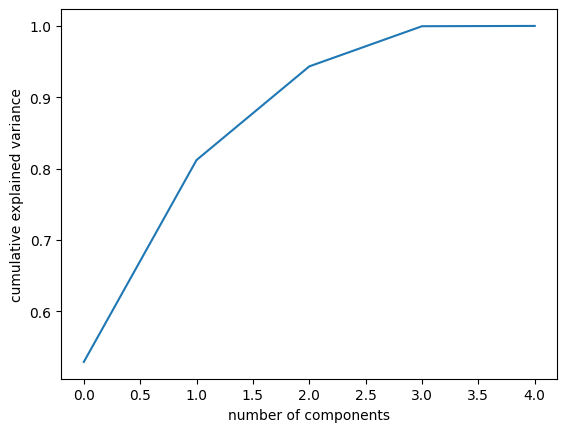

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This block projects the *scaled* data (`X_scaled`) into the 2-dimensional principal component space. `pca.transform(X_scaled)` converts the original data points into their new coordinates along the principal components. `Z1` and `Z2` store the projections onto the first and second principal components, respectively. A scatter plot of `Z1` versus `Z2` is then created, visualizing the data points in the reduced 2D space. This allows for initial observation of data clustering or patterns based on the primary components. The output `Text(0, 0.5, 'Second Principal Component')` indicates the plot was created and labeled.

Text(0, 0.5, 'Second Principal Component')

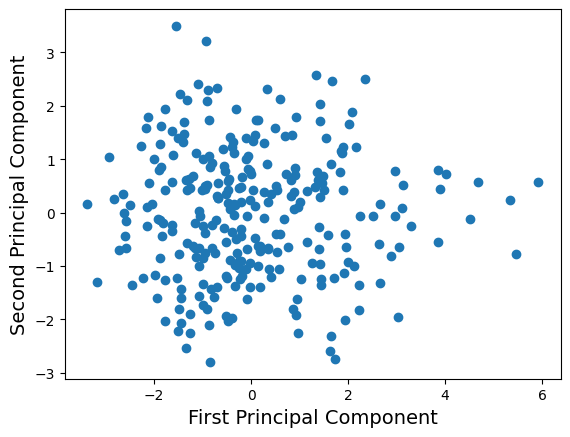

In [ ]:
## project data into PC space

Z1 = pca.transform(X_scaled)[:,0] # see 'prcomp(my_data)$x' in R
Z2 = pca.transform(X_scaled)[:,1]

plt.scatter(Z1,Z2)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)



This cell enhances the previous scatter plot by adding 'supervised' information, coloring the data points based on the 'OSA' (Obstructive Sleep Apnea) status from the original `df_OSA` DataFrame ('Severe' or 'Healthy'). It defines a color dictionary `cdict` and then iterates through the unique 'OSA' groups, plotting each group with its corresponding color. This visualization helps in understanding if the principal components effectively separate the different OSA categories, indicating their utility for classification or discrimination. The output `<matplotlib.legend.Legend at 0x7ea11775ee10>` confirms the plot was successfully generated with a legend.

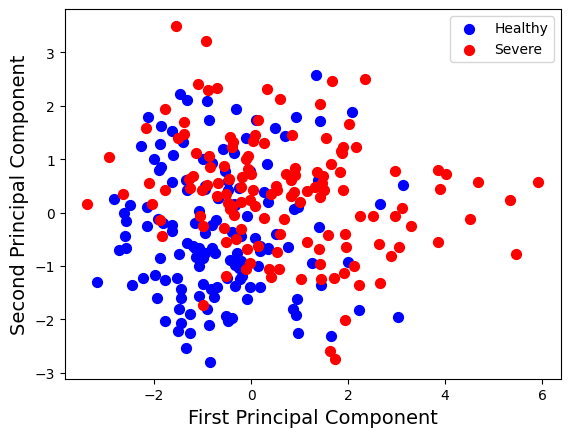

In [ ]:
group = df_OSA['OSA']
cdict = {'Severe': 'red', 'Healthy': 'blue'}


fig, ax = plt.subplots()
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix], Z2[ix], c = cdict[g], label = g, s = 50)

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
ax.legend()


This code prepares the `coeff` array, which contains the loadings (coefficients) of the original features for the first two principal components. `pca.components_[0:2, :]` selects the first two rows (PC1 and PC2) from the principal components matrix, and `np.transpose()` transposes it so that each column corresponds to a principal component and each row corresponds to an original feature. This `coeff` matrix is crucial for creating a biplot, which simultaneously displays both the data points in the reduced space and the direction of the original features. The printed `coeff` and `features` arrays provide the numerical basis for the biplot.

In [ ]:
# This is to plot as a vector the effect
# for every original factor (or variable)
# into the PC1 PC2 space
# Biplot

coeff = np.transpose(pca.components_[0:2, :])

print(coeff)
print(features)

[[ 0.59896837 -0.0933276 ]
 [ 0.20821546 -0.65172377]
 [-0.01592519  0.70546199]
 [ 0.53167123  0.17659296]
 [ 0.56120879  0.19412467]]
Index(['Weight', 'Height', 'Age', 'Cervical', 'BMI'], dtype='object')


This cell generates a biplot, a powerful visualization that combines the scatter plot of the data points in the principal component space with vectors representing the original features. The `myplot` function scales the scatter plot points and draws arrows from the origin, with the direction and length of each arrow indicating the influence and direction of the corresponding original feature in the PC1-PC2 plane. The color of the scatter points is determined by the 'OSA' status, allowing for simultaneous visualization of groups and feature contributions. The `n_var=5` argument ensures all five features are represented as vectors. This plot helps in interpreting the principal components in terms of the original variables and understanding the relationships between features and data separation.

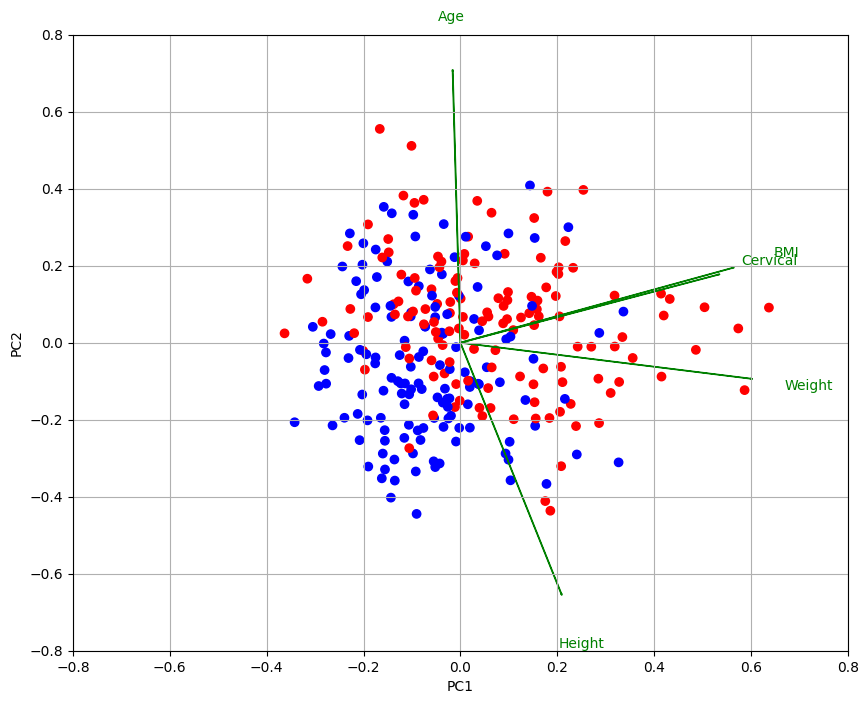

In [ ]:
x_new = pca.transform(X_scaled)

color= ['red' if l == 'Severe' else 'blue' for l in df_OSA['OSA']]

def myplot(score,coeff,n_var,labels=None):
    # n_var number of variables to show in biplot
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = color)

    plot_scale = 1.2

    for i in range(n_var):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'g',alpha = 1)
        if labels is None:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, features[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* plot_scale, coeff[i,1] * plot_scale, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.8,0.8)
    plt.ylim(-0.8,0.8)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
plt.figure(figsize=(10,8))
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),5)
plt.show()

This block introduces t-SNE (t-Distributed Stochastic Neighbor Embedding), another dimensionality reduction technique, particularly useful for visualizing high-dimensional data. It imports `TSNE` from `sklearn.manifold` and records the start time. `TSNE(random_state=123).fit_transform(X_scaled)` applies t-SNE to the *scaled* data (`X_scaled`), reducing its dimensionality to 2D. `random_state` ensures reproducibility. Unlike PCA, t-SNE is non-linear and aims to preserve local neighborhoods, making it effective for visualizing clusters. The print statement shows the time taken for the computation.

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

OSA_tsne = TSNE(random_state=123).fit_transform(X_scaled)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 5.27675724029541 seconds


The `OSA_tsne.shape` command displays the dimensions of the `OSA_tsne` array. After applying t-SNE with default parameters, the output `(278, 2)` confirms that the original 278 data points, which had 5 features, have now been successfully reduced to 2 dimensions, as expected for visualization purposes.

In [ ]:
OSA_tsne.shape

(278, 2)

This code generates a scatter plot of the data points after dimensionality reduction by t-SNE. `OSA_tsne[:,0]` and `OSA_tsne[:,1]` represent the coordinates of the data points in the new 2-dimensional t-SNE space. The points are colored according to the 'OSA' status (`color` variable), similar to the PCA plot. This visualization allows for observing how t-SNE arranges the data, often revealing more distinct clusters or patterns than PCA, especially for non-linear relationships. The output `<matplotlib.collections.PathCollection at 0x7ea11761b050>` indicates the plot was successfully created.

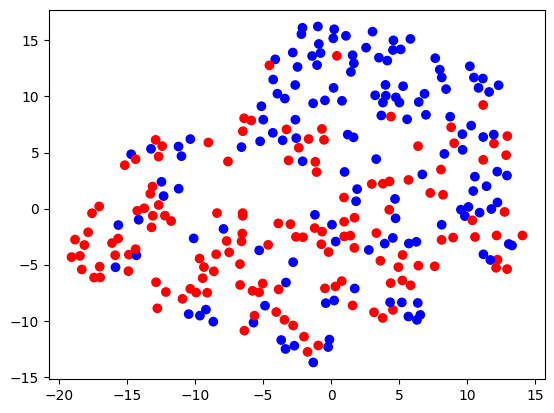

In [ ]:
plt.scatter(OSA_tsne[:,0] ,OSA_tsne[:,1], c = color)

This is an empty code cell. It appears to be a placeholder or was left blank by the user.

# **Select Data** ("UNSUPERVISED") so : NO IAH nor OSA

* ## **Performing PCA**

<font color=red size=5>NOTE:</font>
- ### Display some PCA components
- ### Do you see something strange?

<font color=red size=5>Remember the importance of Scaling before PCA!!!:</font>


* #### Plot after scaling

* ### Cumulative explained variance
        How many dimensions to keep?

* ### Project data

# Adding SUPERVISED information: plot in different colors Severe and Healthy

<font color=red size=4>Understand biplot representation</font>

<font color=   #FF5733   face="times, serif" size=5>=========================================<br>Dimensionality reduction using<br> **t-Distributed Stochastic Neighbouring Entities (t-SNE)**

<font color= #792c35 face="times, bold" size=4>t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

<font color= #eb0a3a size=4>How to Use t-SNE Effectively:</font>

### Although extremely useful for visualizing high-dimensional data, t-SNE plots can sometimes be mysterious or misleading. By exploring how it behaves in simple cases, we can learn to use it more effectively.
See https://distill.pub/2016/misread-tsne/

## See: http://projector.tensorflow.org/ ![imagen.png](attachment:imagen.png)